<a href="https://colab.research.google.com/github/MarcelinaKinyumu/Galaxy_Image_classifier/blob/main/classification_galaxy_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Galaxies According to their Structure(Morphology) using the Galaxy Zoo Project Dataset

## Background

Galaxy classification is fandamental when investigating properties of galaxies in statistical analysis in order to understand their evolution prosess. The galaxies are classified following the Hubble classifications as either spirals, ellipticals or irregulars if they do not fit in any of the previous classifications. Traditionally, galaxies are classified by visualy inspecting galaxy images. With the increase in the number of observed samples, visual classification is not only time consuming or labour intensive, but nearly imposible to classify large galaxy samples. Their is a need to automate the classifications that can replace the visual classifications with high accuracy . 

The Galaxy Zoo Project 2 classfied around 200,000 galaxy images obtained from the Sloan Digital Sky Survey (SDSS), DR7 and other similar surveys. The images are classified into respective categories (37) following a set of 11 questions with the help of the public (citizen scientist).

The project will use the Galaxy Zoo dataset from kaggle consisting of 61,578 galaxy images in the training dataset and 79,973 images for the test dataset.

### Overview

The main aim of this project is to build a model that can automate the galaxy classification in to two main categories (spirals and ellipticals) with very high accuracy.

This notebook contain the following sections,
- Data Exploration
- Selection Method
- Data Preprocessing
- Methodology
- Model Training 
- Model Visualization
- Conclusions and Recommendations



## Exploring and Understanding the Dataset

While the traing dataset contain 61,578 images, the training_solution_rev1.csv file has the information regarding the probablities of a galaxies belonging to the respective classes. From the 37 classes, the main categories of interest are classes 1.1 and 1.2. Based on the first classification question, class 1.1 give the probability of a galaxy being smooth (elliptical) and class 1.2 gives the probability of it having features or disk(spirals). 

For a more clean sample, we will use the images classified with a more than 0.8 probability as belonging to the two classes and labeling then appropriatly. Out of all the traing dataset images, only 24,273 satisfied our requement (>= 0.8 probability in either class 1.1 or 1.2). We separated the data that satisfied our requarements into a new dataframe. When inspecting the new dataframe, no duplicates or missing values were found.


In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries for data exploration
import pandas as pd
import numpy as np

In [5]:
#reading the training csv file and displaying the first 5 row 
#to have a better understanding of the classes
data = pd.read_csv("/content/drive/MyDrive/training_solutions_rev1.csv")
                   #compression="zip")

#data = pd.read_csv('training_solutions_rev1.csv')
data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
#looking for the number of rows and colunm in the dataframe
data.shape

(61578, 38)

We define a fuction that will be used to add the image type extection to the GalaxyID. Since our images are 'jpg', we will use this extection in the defined fuction. The function is then used to add the extection on the dataframe colunm GalaxyID.

In [7]:
#definig a function to add image extections to the GalaxyID
#adding the image extections to the GalaxyID

def append_ext(filename):
    """ Appends `.jpg` file extension to a filename """
    return f"{filename}.jpg"
    #return filename + '.jpg'

#applying the function to the GalaxyID colunm
data["GalaxyID"] = data["GalaxyID"].apply(append_ext)

#printing the first five row of the dataframe to view the changes
data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [8]:
#creating a new dataframe with galaxies having a probability of 0.8 in either class1.1 
#or class1.2
new_data = data[((data["Class1.1"] >= .8) | (data["Class1.2"] >= .8))].reset_index(drop=True)
print(new_data.shape)
new_data.head(5)

(24273, 38)


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.00000,0.054649,0.081974,0.081974,0.327894
2,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.000000,0.208685,0.179056,0.000000,0.032728,0.14098,0.000000,0.000000,0.089185,0.124848
3,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.141605,0.000000,0.007855,0.008768,0.000000,0.00000,0.000000,0.000000,0.000000,0.016623
4,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.142815,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [9]:


#looking for duplicate data
new_data.drop_duplicates(inplace=True)
new_data.shape

#the are no duplicate images in the dataset


(24273, 38)

In [10]:



#inspecting missing data
new_data.isnull().sum().sum()

0

In [11]:
#adding a new colunm with labels for the galaxies with probability greater than 0.8.
#we label those in class1.1 as ellipticals and those in class1.2 as spirals

#define conditions
conditions = [new_data["Class1.1"] >= 0.8, 
              new_data["Class1.2"] >= 0.8]

#define choices
choices = ["elliptical", "spiral"]

#create new column in DataFrame that displays results of comparisons
new_data["class"] = np.select(conditions, choices, default="Tie")

new_data

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,class
0,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,elliptical
1,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,spiral
2,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.208685,0.179056,0.000000,0.032728,0.140980,0.000000,0.000000,0.089185,0.124848,spiral
3,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.000000,0.007855,0.008768,0.000000,0.000000,0.000000,0.000000,0.000000,0.016623,spiral
4,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24268,999786.jpg,0.800415,0.165614,0.033971,0.000000,0.165614,0.044163,0.121451,0.089182,0.076432,...,0.044591,0.044591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089182,elliptical
24269,999795.jpg,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864,spiral
24270,999875.jpg,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857,spiral
24271,999950.jpg,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,elliptical


In [12]:
#Exploring the distributing of the new dataframe
print(new_data[new_data["class"] == "elliptical"].shape)

print(new_data[new_data["class"] == "spiral"].shape)

(8132, 39)
(16141, 39)


## Selection Method
From the new dataframe with elliptical and spiral labels (24,273), we have 8,132 elliptical galaxy images and 16,141 spirals. Since our main interest is on the model accuracy, it is important to balance the number of sample used from both classes to prevent the model from learning to classify only one class. To balance the training dataset, we selected 8000 random samples from each of the two categories. However we first copied a small sample of our data, 500 images from each of the two class, to a new folder for visual inspection. This sample was later manually cropped and used for the Minimum Valuable Product (MVP).

We at some point considered the inclusion of a few antifacts to improve model traing in identifing what is not a spiral or elliptical galaxy. The antifacts category corresponds to Class 1.3. However, this was not included in the final product.

In [13]:
#sort the main data by class 1.3 (antifacts)
data.sort_values("Class1.3", 
                 ascending=False,
                 inplace=True)
data.head(10)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
17392,356310.jpg,0.064853,0.000000,0.935147,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16618,345209.jpg,0.123542,0.000000,0.876458,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58526,955102.jpg,0.172172,0.034034,0.793794,0.034034,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,126783.jpg,0.178000,0.044000,0.778000,0.022000,0.022000,0.000000,0.022000,0.0,0.022000,...,0.022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61345,996629.jpg,0.290021,0.000000,0.709979,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28337,515600.jpg,0.227000,0.068000,0.705000,0.022644,0.045356,0.022678,0.022678,0.0,0.045356,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46887,783039.jpg,0.279000,0.023000,0.698000,0.000000,0.023000,0.000000,0.023000,0.0,0.023000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36732,636777.jpg,0.274000,0.042000,0.684000,0.000000,0.042000,0.000000,0.042000,0.0,0.042000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23081,437063.jpg,0.319300,0.000000,0.680700,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58550,955433.jpg,0.260000,0.060000,0.680000,0.000000,0.060000,0.000000,0.060000,0.0,0.060000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Antifacts classifed with a percentage fraction of 0.8 are only 2. Those with a percentage fraction of 0.6 are 24 and 44 have a fraction of 0.5. It would have been important to visually inspect this subset of objects to ensure they a trully antifacts and will not mislead the model.

In [14]:
#printing out samples of antifacts based on specified selections

#data[data["Class1.3"] >= .8 ] #only 2
#data[data["Class1.3"] >= .6 ].shape # 24
data[data["Class1.3"] >= .5 ] #44

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
17392,356310.jpg,0.064853,0.000000,0.935147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
16618,345209.jpg,0.123542,0.000000,0.876458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
58526,955102.jpg,0.172172,0.034034,0.793794,0.034034,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1791,126783.jpg,0.178000,0.044000,0.778000,0.022000,0.022000,0.000000,0.022000,0.000000,0.022000,...,0.022000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
61345,996629.jpg,0.290021,0.000000,0.709979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
28337,515600.jpg,0.227000,0.068000,0.705000,0.022644,0.045356,0.022678,0.022678,0.000000,0.045356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
46887,783039.jpg,0.279000,0.023000,0.698000,0.000000,0.023000,0.000000,0.023000,0.000000,0.023000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
36732,636777.jpg,0.274000,0.042000,0.684000,0.000000,0.042000,0.000000,0.042000,0.000000,0.042000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
23081,437063.jpg,0.319300,0.000000,0.680700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
58550,955433.jpg,0.260000,0.060000,0.680000,0.000000,0.060000,0.000000,0.060000,0.000000,0.060000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [15]:
#dataframe for the antifacts
df_antifacts = data[data["Class1.3"] >= .5 ]
df_antifacts.shape

(44, 38)

## Data Preprocessing

Since our model was to mainly classify the spirals and the elliptical galaxy images, we procceded with the selection and preprocessing stage in preparation for model training. For the MVP, only 1000 galaxy samples were selected (500 for both the spiral and elliptical galaxaies). We copied the images into a folder in the local machine for visual verification and cropping with the code below.

For the final product a total of 16,000 images were randomly selected as a subset of the filtered data.

In [16]:
# randomly selecting 500 samples in each category for the mvp and 
# saving it in to a new dataframe
df_spiral_new = new_data[new_data["class"] == "spiral"].sample(n=500)
print("This is a sample of spiral galaxies")
print(df_spiral_new.head(5))
print(df_spiral_new.shape)

df_elliptical_new =new_data[new_data["class"] == "elliptical"].sample(n=500)
print("And this is a sample of elliptical galaxies")
print(df_elliptical_new.head(5))
print(df_elliptical_new.shape)

This is a sample of spiral galaxies
         GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
12593  572725.jpg  0.133939  0.852634  0.013428  0.000000  0.852634  0.000000   
15980  691606.jpg  0.121199  0.878061  0.000739  0.878061  0.000000  0.000000   
24239  998418.jpg  0.165062  0.834938  0.000000  0.080474  0.754464  0.039430   
10768  503936.jpg  0.124176  0.875824  0.000000  0.000000  0.875824  0.075037   
9334   449715.jpg  0.090264  0.882255  0.027481  0.026289  0.855966  0.099229   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
12593  0.852634  0.555269  0.297365  ...   0.240737   0.314531   0.000000   
15980  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
24239  0.715034  0.579419  0.175045  ...   0.342663   0.122821   0.113935   
10768  0.800787  0.711715  0.164109  ...   0.608273   0.065048   0.038394   
9334   0.756738  0.716792  0.139174  ...   0.099789   0.306196   0.310807   

       Class11

In [17]:
# importing shutil module
import os
from shutil import copyfile

#creating new directories for the deferent categories
os. mkdir("/home/marcelina/Desktop/DSI/project/data/spirals") 
os. mkdir("/home/marcelina/Desktop/DSI/project/data/ellipticals") 

# define your source and destination directories
#spriral
source_directory1 = "/home/marcelina/Desktop/DSI/project/images_training_rev1"
destination_directory1 = "/home/marcelina/Desktop/DSI/project/data/spirals"
#elliptical
source_directory2 = "/home/marcelina/Desktop/DSI/project/images_training_rev1"
destination_directory2 = "/home/marcelina/Desktop/DSI/project/data/ellipticals"


# loop over your desired files from the dataframe to copy them
# Copy the content of source to destination
for fileName in df_spiral_new["GalaxyID"]: 
    source_file1 = source_directory1 + "/" + fileName 
    destination_file1 = destination_directory1 + "/" + fileName
    copyfile(source_file1, destination_file1)


for fileName in df_elliptical_new["GalaxyID"]: 
    source_file2 = source_directory2 + "/" + fileName 
    destination_file2 = destination_directory2 + "/" + fileName
    copyfile(source_file2, destination_file2)


### Preprocessing for the final product

In [18]:
# selecting equal number of spiral
# and elliptical galaxies
# randomly selecting 8,000 samples in each categiry
df_spiral = new_data[new_data["class"] == "spiral"].sample(n=8000,random_state = 42)
print("This is a sample of spiral galaxies")
print(df_spiral.head(5))
print(df_spiral.shape)

df_elliptical =new_data[new_data["class"] == "elliptical"].sample(n=8000,random_state = 42)
print("And this is a sample of elliptical galaxies")
print(df_elliptical.head(5))
print(df_elliptical.shape)

This is a sample of spiral galaxies
         GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
20666  863568.jpg  0.055449  0.944551  0.000000  0.894966  0.049585  0.000000   
17422  745024.jpg  0.170517  0.829483  0.000000  0.593576  0.235907  0.000000   
23878  985580.jpg  0.096710  0.903290  0.000000  0.903290  0.000000  0.000000   
15765  684719.jpg  0.048381  0.951619  0.000000  0.034938  0.916681  0.287033   
6305   340999.jpg  0.074525  0.897899  0.027576  0.000000  0.897899  0.441543   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
20666  0.049585  0.000000  0.049585  ...   0.000000   0.000000   0.000000   
17422  0.235907  0.000000  0.235907  ...   0.000000   0.000000   0.000000   
23878  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
15765  0.629648  0.790393  0.126288  ...   0.188969   0.427433   0.173989   
6305   0.456356  0.806458  0.091441  ...   0.142079   0.522301   0.142079   

       Class11

In [19]:
#merging the two dataframes together to make the traing dataframe
#sellecting only the galaxyid and classes columns
frames = [df_spiral, df_elliptical]
df_galaxies = pd.concat(frames)
df_galaxies = df_galaxies[["GalaxyID", "class"]]
df_galaxies.head(5)

,GalaxyID,class
20666,863568.jpg,spiral
17422,745024.jpg,spiral
23878,985580.jpg,spiral
15765,684719.jpg,spiral
6305,340999.jpg,spiral


In [20]:
# printing the shape of the final dataframe
df_galaxies.shape

(16000, 2)

In [22]:
# visualing one of the images and the image size

#images
img= image.load_img("./images_training_rev1/104934.jpg")
img2 = image.load_img("./images_training_rev1/582003.jpg")

#Subplots
plt.figure(figsize=(12,4.5))
plt.subplot(141)
plt.imshow(img)
plt.title("Spiral Galaxy", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img2)
plt.title("Elliptical Galaxy", y=1.02, fontsize=12)

;

''

In [ ]:
print("The images are of size: ")
cv2.imread("./images_training_rev1/104934.jpg").shape

#the images have the shape 424,424,3

## Methodology
For the mvp, the 1000 cropped images were used to train the model while trying both gray scale and the RGB scale. The models trained with the RGB scale performed better which showed the importance of colour in galaxy classifcations. Unfortunately, it was harder to get a good performance with such a small sample. We later included the earlier selected sample of 16,000 galaxies in RGB colour as the training sample and tried optimizing on the number of layers, filters and other parameters to improve the model performance.

To prepare the data for model training we used the ImageDataGenerator and the training dataframe for the image id and the class columns to lable the images. We resized the image size to 212 x 212, used the RGB colour and a batch_size of 32. The training (80%) and the validation (20%) datasets were separated by the 80-20 rule. We randomly shuffled the images so that the model will not learn to classfy one category more. The elliptical galaxies have the zero lable (0) while the spiral galaxies have the one (1).

The model that gave us an optimum performance was a cnn model with seven layers which include an input layer, three fully connected layers and the final three dense layers with relu activation functions for all layers as shown in the model summary. We used the categorical_crossentropy loss function, Adam optimizer with a learning rate of 0.001 and measured the accuracy. Checkpoints and early stoppings where used to prevent the model from overfitting and only saving the best model.

## Model Training

In [23]:
#importing libraries for data visualization and model training

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np
import os
#from google.colab.patches import cv2_imshow # cv2.imshow does not work on 
#Google Colab notebooks, which is why we are using cv2_imshow instead

In [ ]:
#unziping the test image folder
import zipfile
with zipfile.ZipFile("../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# Using the ImageDataGenerator to prepare the data for training
datagen = ImageDataGenerator(rescale=1./255.,
                           validation_split=0.2,

)


train_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                          target_size = (212,212),
                                          directory = "./images_training_rev1",
                                          batch_size = 32,
                                          x_col="GalaxyID",
                                          y_col="class",
                                          color_mode="rgb",
                                          class_mode="categorical",
                                          subset="training",
                                          shuffle=True,
                                          seed=42
                                         )
valid_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                            target_size=(212, 212),
                                            directory = "./images_training_rev1",
                                            batch_size=32,
                                            x_col="GalaxyID",
                                            y_col="class",
                                            color_mode="rgb",
                                            class_mode="categorical",
                                            subset="validation",
                                            shuffle=True,
                                            seed=42
                                           )                                        

In [ ]:
#printing the generated class and the index class
train_generator.class_indices

In [24]:
#the cnn model architecture
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(6,6),activation = 'relu',
                                                           input_shape=(212,212,3)),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(32,(5,5),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Flatten(),
                                  
                                  #
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  tf.keras.layers.Dense(256, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                   #
                                  tf.keras.layers.Dense(2, activation='softmax')
                                  ])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 207, 207, 16)      1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 103, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        1

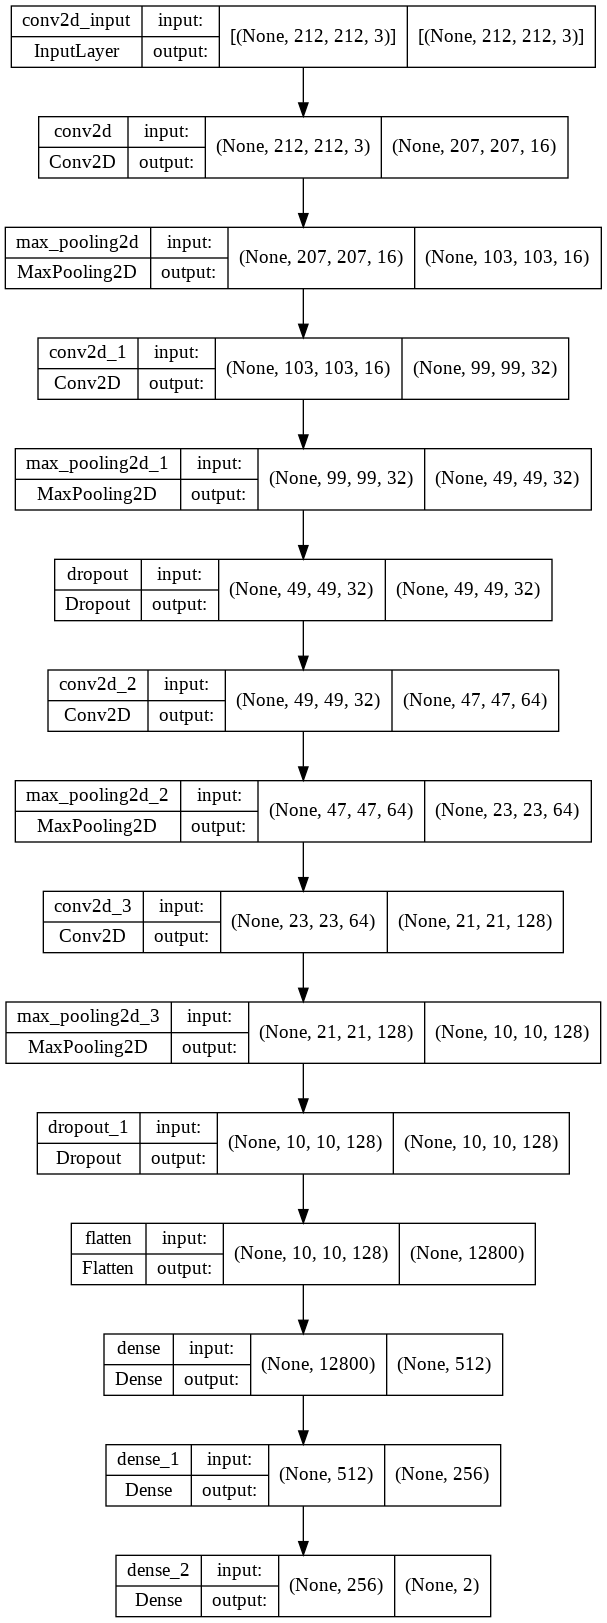

In [25]:
#printing and saving the model summary and architecture
summary = model.summary()
tf.keras.utils.plot_model(model, to_file="model_plot3.png", 
                          show_shapes=True, show_layer_names=True)

In [26]:
#creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model3.h5", 
                             monitor = "val_loss",
                             verbose = 0, 
                             save_best_only = True, 
                             mode = "auto")
#Specifying an earlystopping to avoid overfitting
stopping = EarlyStopping(monitor = "val_loss",
                         patience = 10,
                         verbose = 0,
                         mode = "auto")

In [27]:
#compliling the model 
model.compile(
loss="categorical_crossentropy",
optimizer=Adam(learning_rate=0.001),
metrics=["accuracy"])


In [ ]:
#model fitting
hist = model.fit(train_generator, epochs = 30, validation_data=valid_generator, 
                 callbacks = [checkpoint, stopping])

In [ ]:
#creating subplots for traing plots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# summarize history for accuracy
axes[0].plot(hist.history['accuracy'])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')


# summarize history for loss
axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

#fig.title('Model Accuracy')
plt.savefig('model_Accuracy_plot.png')
plt.show()


In [ ]:
#getting a link to dowmload the the model and the plots 
os.chdir(r"../working")
from IPython.display import FileLink

FileLink(r"model_Accuracy_plot.png")

FileLink(r"model_plot3.png")

FileLink(r"best_model3.h5")
         


### Testing the model with a new dataset not used in training

In [28]:
#Trying to obtain the rows that were not in the traing set 
#for final testing of our trained model

# we start by appening the traing datast in the whole dataframe 
#for spirals and elliptical galaxies 
df_spiral_all = new_data.append(df_spiral)
df_all = df_spiral_all.append(df_elliptical)

#drop rows which contain duplicates, Drop all duplicates.
df_test_all = df_all.drop_duplicates(keep=False)
df_test_all.shape


(8273, 39)

In [29]:
# printing the shape of the dataframe for the specific categories
print(df_test_all[df_test_all["class"] == "spiral"].shape)
print(df_test_all[df_test_all["class"] == "elliptical"].shape)

(8141, 39)
(132, 39)


In [30]:
#Preparing an equal sample of text data for the model
df_spiral_test = df_test_all[df_test_all["class"] == "spiral"].sample(n=130,
                                                                      random_state = 42)
#
df_elliptical_test = df_test_all[df_test_all["class"] == "elliptical"].sample(
    n=130, random_state = 42)

#merging the two dataframes together to make the testing dataframe
#sellecting only the galaxyid and classes colunms
frame = [df_spiral_test, df_elliptical_test]
df_test_new = pd.concat(frame)
df_test_new = df_test_new[["GalaxyID", "class"]]
df_test_new.shape


(260, 2)

In [31]:
#labling the test images with ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255.,
                           )

test_generator = datagen.flow_from_dataframe(dataframe = df_test_new,
                                          target_size = (212,212),
                                          directory = "./images_training_rev1",
                                          batch_size = 32,
                                          x_col="GalaxyID",
                                          y_col="class",
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          shuffle=True,
                                          seed=42)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 260 invalid image filename(s) in x_col="GalaxyID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [34]:
#Printing the loss value and the accuracy for the evaluation with test data
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


## Model Visualization

In [35]:
# printing the sumary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 207, 207, 16)      1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 103, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        1

#### Visualizing a disc like spiral galaxies

In [ ]:
# uploading an image for prediction
img_upload = "../input/image-next/images.jpeg"

img = image.load_img(img_upload, target_size=(212, 212))

plt.imshow(cv2.imread(img_upload));# Visualize image

In [ ]:
#the first class is elliptical while the second class is spiral
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#making a prediction
preds = model.predict(x)
print(preds)

In [ ]:
# Defining a fuction that takes an input and outputs a 
#Gradient Class Activation Map for the final spacified layer
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv2d_3")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:
#visualizing the heat map

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((21, 21))
plt.matshow(heatmap)
plt.savefig("Astromomy.png")
plt.show()

In [ ]:
#getting a link to dowmload the the heatmap image
os.chdir(r"../working")
from IPython.display import FileLink
FileLink(r"Astromomy.png")

#### Visualizing an elliptical galaxy

In [ ]:
# uploading an image for prediction
img_upload = "../input/elliptical/Elliptical_galaxy.jpg"

img = image.load_img(img_upload, target_size=(212, 212))

plt.imshow(cv2.imread(img_upload));# Visualize image

In [ ]:
#the first class is elliptical while the second class is spiral
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#making a prediction
preds = model.predict(x)
print(preds)

In [ ]:
# Defining a fuction that takes an input and outputs a 
#Gradient Class Activation Map for the final spacified layer
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv2d_3")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:
#visualizing the heat map

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((21, 21))
plt.matshow(heatmap)
plt.savefig("Astromomy2.png")
plt.show()

In [ ]:
#getting a link to dowmload the the heatmap image
os.chdir(r"../working")
from IPython.display import FileLink
FileLink(r"Astromomy2.png")

## Conclusion and Recommendations
### Conclusion
The model architecture seem to perform considerably well for our sample with an optimized  validation and test accuracy within the range (96 - 98)%. More augmentation is needed for the model to generalise well. However,from random image predictions and plotting the heat maps form the model, it seemed that most of the galaxies well classified as spiral galaxies were the disk like spiral galaxy type (See the first image and the corresponding image heat map in the Model Visualization). Surprisingly, galaxies with very well defined and observed arms are strongly mis-classified as elliptical. But going back to the images, it was evident that our selected sample of spriral galaxies was heavily bias towards the disk like structures. The small number of spiral galaxies were maybe consided outliers by our model.

### Recommendations
- Based on the type of galaxies classifed as spiral glaxies, it maybe important for the sample of spiral galaxies to be balanced between the two or more classifications added for an improvement in the classifications.
- The traing data could be increased by including the galaxies with a lower percentage fraction in our selection criteria.
- Linear based models can be used to compare our model perfomance with.